# Chapter 11. The Lambert Problem
## Action by Juanita A. Agudelo-Quiceno, University of Antioquia

In this notebook we will present theory from the Lambert Problem related to mechanical orbits and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:
> Prussing, J. E., & Conway, B. A. (1993). Orbital Mechanics. Oxford university press.

 ## Section 11.1: Introduction

The Lambert problem is about solving a fundamental problem in astrodynamics, how to travel from one point to another in space?. The Lambert problem aims to find an orbit that connects the positions of two bodies in space and the flight time that separates them. There are various applications that are currently used, for example, when a spacecraft is launched into space, it is necessary to calculate the route and the time it takes to travel to its target, which can be a planet or another spacecraft moving in a known orbit. We say that the spacecraft <i>intercepts</i> the target when their positions coincide, or the spacecraft <i>rendezvous</i> with the target when they meet at the same position and velocity. Other examples may include scheduling of encounters or approaches and determination of spacecraft orbits.

In this section, we will develop the theoretical and practical concepts of the Lambert problem, its applications in real space travel, and how they help us understand the usefulness of this problem. To begin, we will illustrate a very common example in the world of space travel. It involves a spacecraft carrying supplies or even people to the International Space Station (ISS). In this case, the objective, the ISS, has an orbit that we already know, and the spacecraft, which in this case is the Russian Soyuz spacecraft, must properly dock with the space station by matching their positions and velocities to successfully take the crew of the soyuz to the space station. In summary, the Soyuz must rendezvous with the ISS.

To provide historical context to the exercise, let us imagine that the space mission is the Soyuz TMA-9. The Soyuz TMA series operated between 2002 and 2011 to transport crews to the International Space Station and serve as an emergency vehicle for it. It is a modified version of the Soyuz TM and its predecessors, with improvements in digital equipment and cabin space due to the height of the astronauts.

<style>
#hp  {
float: right;    
 margin: 0 0 0 15px;
}
img {
  border-radius: 50%;
}
</style>

<table>
    <thead>
        <tr>
            <th colspan="2" style="font-size:30px"><center>The first space tourist</center></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td colspan="2">
            <img src="Anousheh.jpg" alt="Anousheh Ansari, the first space tourist" width="400" height="300" id="hp"/>
            The Soyuz TMA-9 mission was a spaceflight launched on September 18, 2006, and lasted for about 10 days. The mission was a part of the International Space Station (ISS) program and was carried out by the Russian Federal Space Agency (Roscosmos).
            The Soyuz TMA-9 spacecraft carried three crew members to the ISS: Russian cosmonaut Mikhail Tyurin, American astronaut Michael Lopez-Alegria, and the first space tourist, Iranian-American entrepreneur Anousheh Ansari. Ansari paid a reported $20 million for her trip to the ISS, which made her the fourth privately funded space tourist and the first female space tourist.

During her stay on the ISS, Ansari conducted various experiments and communicated with people on the Earth through a blog. She also became the first person to deliver a video message from space to the TED Conference, which was held in Monterey, California.

The Soyuz TMA-9 mission marked a significant milestone in the history of space travel, as it demonstrated that private individuals could travel to space by paying for their trips. This paved the way for the development of commercial spaceflight and space tourism, which has gained momentum in recent years.
</td>
        </tr>
    </tbody>
</table>



In the following code we start from the meeting of the ships and we perform a backward integration in time to see their orbits before the meeting. The integration is done with <b>Rebound</b>. The resulting animation is an example of a meeting in position and speed of two bodies.

So let's write some code! 

In [ ]:
#prerrequisites
"""
!pip install -q rebound
!pip install -q celluloid
!pip install -q plolty
"""

In [1]:
#required libreries
import rebound as rb
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
import celluloid as cell
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as im
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from LambertProblemTools import elipse

We start the simulation and add the earth with its respective value of mass and the ISS with its orbital parameters

In [3]:
sim = rb.Simulation()
sim.units = ["km","kg","s"]
sim.add(m=5.9e24)  
sim.add(m=0, a=6.7, e=6.13e-3)

We give the Soyuz a boost in speed

In [4]:
r_soyuz = np.array(sim.particles[1].xyz) + 0.001
v_soyuz = sim.particles[1].vxyz

delta_v = 20
v_soyuz[0], v_soyuz[1] = v_soyuz[0] + delta_v, v_soyuz[1] + delta_v

sim.add(m=0, x=r_soyuz[0], y=r_soyuz[1], z=r_soyuz[2], vx=v_soyuz[0], vy=v_soyuz[1], vz=v_soyuz[2])

We perform the integration backwards in time

In [5]:
Nt = 200
steps = np.linspace(0, 5, Nt)
r_iss = np.zeros((Nt+1, 3))
r_soyuz = np.zeros((Nt+1, 3))
r_earth = np.zeros((Nt+1, 3))

v_iss = np.zeros((Nt+1, 3))
v_soyuz = np.zeros((Nt+1, 3))

r_iss[0] = sim.particles[1].xyz
r_soyuz[0] = sim.particles[2].xyz
r_earth[0] = sim.particles[0].xyz

v_iss[0] = sim.particles[1].vxyz
v_soyuz[0] = sim.particles[2].vxyz

for i, step in enumerate(steps):
    sim.integrate(-step)

    r_earth[i+1] = sim.particles[0].xyz
    r_iss[i+1] = sim.particles[1].xyz
    r_soyuz[i+1] = sim.particles[2].xyz

    v_iss[i+1] = sim.particles[1].vxyz
    v_soyuz[i+1] = sim.particles[2].vxyz

In [6]:
#animacion
plt.ioff()
plt.style.use('dark_background')

fig,ax=plt.subplots(figsize=(10,8))

camera = cell.Camera(fig)

earth = im.imread('earth.png')
Iss = im.imread('ISS.png')
Spyuz = im.imread('Soyuz.png')

imagebox1 = OffsetImage(earth, zoom = 0.3)
imagebox2 = OffsetImage(Iss, zoom = 0.2)
imagebox3 = OffsetImage(Spyuz, zoom = 0.03)

for i in range(len(r_earth[1:10,0])):
  ab1 = AnnotationBbox(imagebox1, (r_earth[1:10,0][-i], r_earth[1:10,0][-i]), frameon = False)
  ab2 = AnnotationBbox(imagebox2, (r_iss[1:10,0][-i],r_iss[1:10,1][-i]), frameon = False)
  ab3 = AnnotationBbox(imagebox3, (r_soyuz[1:10,0][-i], r_soyuz[1:10,1][-i]), frameon = False)

  ax.plot(r_iss[:,0], r_iss[:,1], '.', markersize=1, alpha=0.5)
  ax.plot(r_soyuz[:,0], r_soyuz[:,1], '.', markersize=1, alpha=0.5)
        
  ax.plot(r_earth[1:10,0][-i],r_earth[1:10,1][-i], '.', markersize=10)
  ax.plot(r_iss[1:10,0][-i],r_iss[1:10,1][-i], '.', markersize=5)
  ax.plot(r_soyuz[1:10,0][-i],r_soyuz[1:10,1][-i], '.')

  ax.add_artist(ab1)
  ax.add_artist(ab2)
  ax.add_artist(ab3)

  camera.snap()
    
plt.close()
plt.ion();

In [7]:
anim = camera.animate(interval=250)

In [8]:
HTML(anim.to_html5_video())

In [9]:
from scipy import linalg

r_iss_norm = [linalg.norm(i) for i in r_iss[1:10]]
r_soyuz_norm = [linalg.norm(i) for i in r_soyuz[1:10]]

v_iss_norm = [linalg.norm(i) for i in v_iss[1:10]]
v_soyuz_norm = [linalg.norm(i) for i in v_soyuz[1:10]]

In [15]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Position vector magnitude Soyuz and ISS', 'Velocity vector magnitude Soyuz and ISS'))

#positions
fig.add_trace(go.Scatter(x=r_iss_norm, y=steps[1:10], name='r_x ISS', line=dict(color='firebrick', width=4)), row=1, col=1)
fig.add_trace(go.Scatter(x=r_soyuz_norm, y=steps[1:10], name = 'r_x Soyuz', line=dict(color='royalblue', width=4)), row=1, col=1)

#velocities
fig.add_trace(go.Scatter(x=v_iss_norm, y=steps[1:10], name='v_x ISS', line=dict(color='cyan', width=4)), row=1, col=2)
fig.add_trace(go.Scatter(x=v_soyuz_norm, y=steps[1:10], name = 'v_x Soyuz', line=dict(color='coral', width=4)), row=1, col=2)

fig.update_xaxes(title_text="Time [s]", row=1, col=1)
fig.update_xaxes(title_text="Time [km/s]", row=1, col=2)

fig.update_yaxes(title_text="Position [km]", row=1, col=1)
fig.update_yaxes(title_text="Velocity [km/s]", row=1, col=2)

fig.show()

 ## Section 11.2: Transer Orbits Between Specified Points 

<style>
.center {
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 40%;
}
</style>


To begin to deal with our problem, let us consider the geometry shown in the figure (1). Let's consider the points $P_1$ and $P_2$ located on the elipse and described by radius vectors $\vec{r_1}$ and $\vec{r_2}$ who start from the focus $F$ located at the center of atraction. The points $P_1$ and $P_2$ are separeted by the tranfer angle $\theta$ and the chord $c$. The triangle formed $P_1P_2F$ it's call the <i>space triangle</i> for the transfer. 


 <img src="Transfer-Orbit-Geometry.png" alt="Transfer Orbit Geometry" class="center"> 
 <center><b>Fig. 1:</b> Transfer Orbit Geometry </center>

There is a very important geometric property of ellipses that will be used to determine the transfer orbit between points $P_1$ and $P_2$. The property consists in that the sum of the distances from any point located on the ellipse and the focus and the opposite focus is constant and has a value of $2a$ where a is the value of the semi-major axis. The above property follows directly from the definition of an ellipse, the locus of all points in a plane, such that the sum of the distances to two other fixed points, called focus, is constant.

$$
P_1 F + P_1 F^{*} = 2a 
$$

or 

$$
P_2 F + P_2 F^{*} = 2a 
$$

Thus, 

$$
P_1 F^{*} = 2a - r_1 
$$

and 

$$
P_2 F^{*} = 2a - r_2 
$$

In the following gif we show this property by creating a elipse and calculated the distance between some point and both focus. We can see that the sum $PF1$ and $PF2$ is a constant and have a value $2a$

In [15]:
a = 3
b = 2
theta = np.linspace(0,2*np.pi,200)
ep1x = a*np.cos(theta)
ep1y = b*np.sin(theta)

c = (a**2 - b**2)**(1/2) 

f1 = [c,0]
f2 = [-c,0]

def long(x,y):
    return ((x[0]-y[0])** 2 + (x[1]-y[1])**2)**(1/2)

In [19]:
plt.ioff()

fig,ax=plt.subplots(figsize=(8,6))
camera = cell.Camera(fig)

for i in range(len(ep1x)):
        long1 = long([ep1x[i], ep1y[i]], f1)
        long2 = long([ep1x[i], ep1y[i]], f2)

        ax.plot(ep1x, ep1y)
        ax.plot(f1[0],f1[1],'.')
        ax.plot(f2[0],f2[1], '.')
        ax.plot([f1[0], ep1x[i]], [f1[1], ep1y[i]],'bo', linestyle="--")
        ax.plot([f2[0], ep1x[i]], [f2[1], ep1y[i]],'bo', linestyle="--")

        ax.text(2.6, 2, f'PF1: {np.round(long1, 2)}', style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 2})
        ax.text(2.6, 1.80, f'PF2: {np.round(long2,2)}', style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 2})
        ax.text(2.2, 1.60, f'PF1 + PF2: {np.round(long1 + long2, 2)}', style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 2})
        ax.text(ep1x[i], ep1y[i]+0.1, r'P', fontsize=12)
        ax.text(f1[0], f1[1]-0.2, r'F1', fontsize=12)
        ax.text(f2[0], f2[1]-0.2, r'F2', fontsize=12)
        ax.set_title('Ellipse Geometric Property', fontsize=15)

        ax.set_aspect('equal', adjustable='box')

        camera.snap()
    
plt.close()
plt.ion();

In [20]:
anim = camera.animate(interval=150)

In [21]:
HTML(anim.to_html5_video())

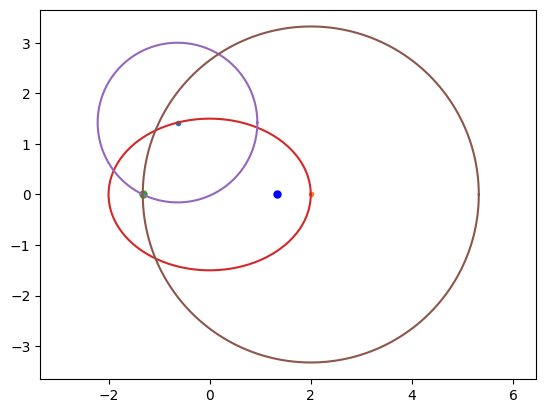

In [3]:
a = 2
b = 1.5
theta = np.linspace(0,2*np.pi,200)
ep1x = a*np.cos(theta)
ep1y = b*np.sin(theta)

c = (a**2 - b**2)**(1/2) 

r1 = 2*a - ((ep1x[60] - c)**2 + (ep1y[60] - 0)**2)**(1/2)
r2 = 2*a - ((ep1x[0] - c)**2 + (ep1y[0] - 0)**2)**(1/2)

cp1x = ep1x[60] + r1*np.cos(theta)
cp1y = ep1y[60] + r1*np.sin(theta)

cp2x = ep1x[0] + r2*np.cos(theta)
cp2y = ep1y[0] + r2*np.sin(theta)


plt.plot(ep1x[60], ep1y[60], '.')
plt.plot(ep1x[0], ep1y[0], '.')
plt.plot(-c,0,'.', markersize='10')
plt.plot(c,0, '.', markersize='10', color='b')
plt.plot(ep1x, ep1y)
plt.plot(cp1x, cp1y)
plt.plot(cp2x, cp2y)
plt.axis('equal');

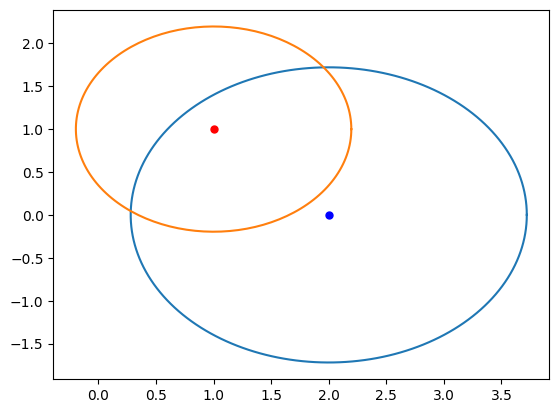

In [5]:
r1 = 1 #UA
r2 = 1.524 * r1 #UA

#transfer orbit earth - mars

a = 1.36 * r1
e = 0.26


theta = np.deg2rad(180 - 107)

#punto 1 (tierra) y punto 2 (marte)
earth = [r1 + c,0]
mars = [c - r2*np.cos(theta), r2*np.sin(theta)]

theta1 = np.linspace(0,2*np.pi,200)

#theta = np.linspace(0,2*np.pi,200)
#elipsex = self.a*np.cos(theta)
#elipsey = self.b*np.sin(theta)

#EL IMPUT SON LAS POSICIONES DE LOS PLANETAS 
r1earth = 2*a - r1
earth = [2, 0]
cearthx = earth[0] + r1earth*np.cos(theta1)
cearthy = earth[1] + r1earth*np.sin(theta1)

r2mars = 2*a - r2
mars = [1,1]
cmarsx = mars[0] + r2mars*np.cos(theta1)
cmarsy = mars[1] + r2mars*np.sin(theta1)



#plt.plot(0, 0, '*', markersize='20', color = 'y')
plt.plot(earth[0], earth[1], '.', markersize='10', color='b')
plt.plot(mars[0], mars[1], '.', markersize='10', color='r')

#plt.plot(c,0, '*', markersize='10', color='y')
#plt.plot(-c,0, '.', markersize='10', color='orange')
plt.plot(cearthx, cearthy)
plt.plot(cmarsx, cmarsy)
#plt.axis('equal');

In [3]:
e_x, e_y

(array([ 1.36      ,  1.35932216,  1.35728932,  1.3539035 ,  1.34916809,
         1.34308779,  1.33566868,  1.32691814,  1.3168449 ,  1.305459  ,
         1.29277179,  1.27879591,  1.26354531,  1.24703517,  1.22928197,
         1.21030339,  1.19011835,  1.16874698,  1.14621057,  1.1225316 ,
         1.09773366,  1.07184148,  1.04488086,  1.01687869,  0.98786286,
         0.95786231,  0.92690695,  0.89502762,  0.86225612,  0.82862509,
         0.79416807,  0.75891941,  0.72291425,  0.68618846,  0.64877867,
         0.61072216,  0.57205687,  0.53282135,  0.49305469,  0.45279655,
         0.41208705,  0.37096677,  0.3294767 ,  0.2876582 ,  0.24555297,
         0.20320295,  0.16065038,  0.11793767,  0.0751074 ,  0.03220226,
        -0.01073498, -0.05366152, -0.09653457, -0.13931139, -0.18194934,
        -0.22440592, -0.26663881, -0.30860591, -0.35026538, -0.3915757 ,
        -0.43249569, -0.47298456, -0.51300194, -0.55250796, -0.59146322,
        -0.6298289 , -0.66756675, -0.70463916, -0.7

In [3]:
"""
a = 2
b = 1.5
theta = np.linspace(0,2*np.pi,200)
ep1x = a*np.cos(theta)
ep1y = b*np.sin(theta)

c = (a**2 - b**2)**(1/2) 

r1 = 2*a - ((ep1x[60] - c)**2 + (ep1y[60] - 0)**2)**(1/2)
r2 = 2*a - ((ep1x[0] - c)**2 + (ep1y[0] - 0)**2)**(1/2)

cp1x = ep1x[60] + r1*np.cos(theta)
cp1y = ep1y[60] + r1*np.sin(theta)

cp2x = ep1x[0] + r2*np.cos(theta)
cp2y = ep1y[0] + r2*np.sin(theta)
"""

r1 = 1 #UA
r2 = 1.524 * r1 #UA

#transfer orbit earth - mars
elipse1 = elipse()
elipse1.a = 1.36 * r1
elipse1.e = 0.26

theta = np.deg2rad(180 - 107)

#punto 1 (tierra) y punto 2 (marte)
earth = [r1 + elipse1.c,0]
mars = [elipse1.c - r2*np.cos(theta), r2*np.sin(theta)]

theta1 = np.linspace(0,2*np.pi,200)

e_positions = elipse1.GetElipse()

r1earth = 2*elipse1.a - r1
cearthx = earth[0] + r1earth*np.cos(theta1)
cearthy = earth[1] + r1earth*np.sin(theta1)

r2mars = 2*elipse1.a - r2
cmarsx = mars[0] + r2mars*np.cos(theta1)
cmarsy = mars[1] + r2mars*np.sin(theta1)



#plt.plot(0, 0, '*', markersize='20', color = 'y')
#plt.plot(earth[0], earth[1], '.', markersize='10', color='b')
#plt.plot(c,0, '*', markersize='10', color='y')
#plt.plot(-c,0, '.', markersize='10', color='orange')
#plt.plot(cearthx, cearthy)
#plt.plot(cmarsx, cmarsy)
#plt.plot(e_positions[:,0], e_positions[:,1])
#plt.axis('equal');

In [4]:
e_positions

array([[ 1.36      ,  0.        ],
       [ 1.35932216,  0.        ],
       [ 1.35728932,  0.        ],
       [ 1.3539035 ,  0.        ],
       [ 1.34916809,  0.        ],
       [ 1.34308779,  0.        ],
       [ 1.33566868,  0.        ],
       [ 1.32691814,  0.        ],
       [ 1.3168449 ,  0.        ],
       [ 1.305459  ,  0.        ],
       [ 1.29277179,  0.        ],
       [ 1.27879591,  0.        ],
       [ 1.26354531,  0.        ],
       [ 1.24703517,  0.        ],
       [ 1.22928197,  0.        ],
       [ 1.21030339,  0.        ],
       [ 1.19011835,  0.        ],
       [ 1.16874698,  0.        ],
       [ 1.14621057,  0.        ],
       [ 1.1225316 ,  0.        ],
       [ 1.09773366,  0.        ],
       [ 1.07184148,  0.        ],
       [ 1.04488086,  0.        ],
       [ 1.01687869,  0.        ],
       [ 0.98786286,  0.        ],
       [ 0.95786231,  0.        ],
       [ 0.92690695,  0.        ],
       [ 0.89502762,  0.        ],
       [ 0.86225612,

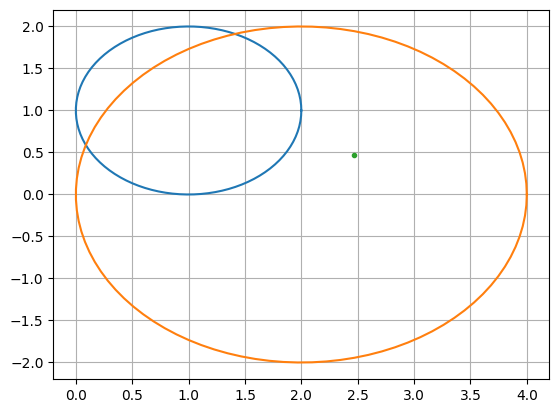

In [8]:
import numpy as np
r1 = 1
r2 = 2

c1 = [1,1]
c2 = [2,0]

theta = np.linspace(0,2*np.pi, 100)

x1 = c1[0] + r1*np.cos(theta)
y1 = c1[1] + r1*np.sin(theta)

x2 = c2[0] + r2*np.cos(theta)
y2 = c2[1] + r2*np.sin(theta)

#calculo de la posición de las intersecciones 
vec_i = [c2[0] - c1[0], c2[1] - c1[1]]
i = np.linalg.norm(vec_i)
unit_i = [vec_i[0]/i, vec_i[1]/i]

theta = np.arccos((r1**2 + r2**2 - i**2)/(2*r1*r2))

alpha = np.arcsin((r2/i)*np.sin(theta))

i1 = r1*np.cos(alpha)
vec_i1 = [i1/unit_i[0], i1/unit_i[1]]

p1 = ((r1*r2)/i)*np.sin(theta)

unit_p1 = np.cross([0,0,1], unit_i)/i

vec_p1 = [p1*unit_p1[0], p1*unit_p1[1]]

r1 = [c1[0] + vec_i[0] + vec_p1[0], c1[1] + vec_i[1] + vec_p1[1]]


plt.plot(x1, y1)
plt.plot(x2,y2)
plt.plot(r1[0], r1[1], '.')
plt.grid();

In [31]:
alpha =  np.arccos((2 + 1 - 4) / (2*(2)**(1/2)))
np.cos(alpha)



-0.3535533905932737

In [22]:
import numpy as np
theta = np.arccos((1 + 4 - 2)/4)
alpha = np.arcsin((2/(2**(1/2)))*np.sin(theta))
i_1 = np.cos(alpha)
p_1 = (2/(2**(1/2)))*np.sin(theta)

1-(0.353/(2**(1/2)))+(1/2)*0.93541

#(2/(2**(1/2)))*np.sin(theta)


1.2180963062411487

In [49]:
#funcion que encuentra los puntos de intersección entre dos circunferencias dados los centros y el radio. 

def getCircleIntersection(center1, center2, radio1, radio2):
    r1 = radio1
    r2 = radio2

    c1 = np.array(center1)
    c2 = np.array(center2)

    d = ((c2[0]-c1[0])**2 + (c2[1] - c1[1])**2)**(1/2)
    a = (r1**2 - r2**2 + d**2)/(2*d)

    dx = (c2[0] - c1[0])/d
    dy = (c2[1] - c1[1])/d

    px = c1[0] + a*dx
    py = c1[1] + a*dy

    h = (r1**2 - a**2)**(1/2)

    p1_x = px + h*dy
    p1_y = py - h*dx

    p2_x = px - h*dy
    p2_y = py + h*dx

    point1 = [p1_x, p1_y]
    point2 = [p2_x, p2_y]
    
    return point1, point2

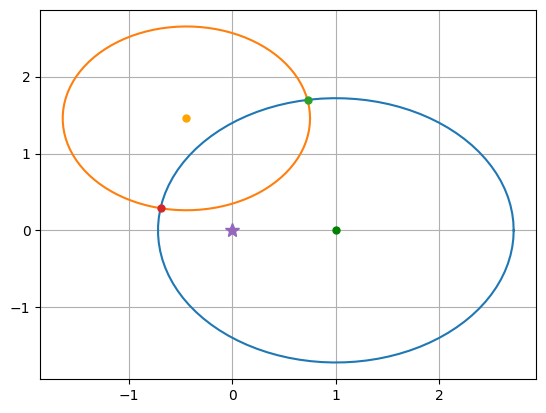

In [48]:

theta = np.linspace(0,2*np.pi, 100)

r1 = 1
r2 = 1.524*r1

a = 1.36*r1
e = 0.26

c_r1 = 2*a - r1
c_r2 = 2*a - r2

theta = np.deg2rad(107)

earth = np.array([r1,0])

x2 = r2*np.cos(np.pi - theta)
y2 = r2*np.sin(np.pi - theta) 
mars = np.array([-x2,y2])

alpha = np.linspace(0,2*np.pi, 100)

c_x1 = earth[0] + c_r1*np.cos(alpha)
c_y1 = earth[1] + c_r1*np.sin(alpha)

c_x2 = mars[0] + c_r2*np.cos(alpha)
c_y2 = mars[1] + c_r2*np.sin(alpha)

F = np.array([0,0])

F1_, F2_ = getCircleIntersection(earth, mars, c_r1, c_r2)


plt.plot(c_x1, c_y1)
plt.plot(c_x2,c_y2)
plt.plot(F1_[0], F1_[1], '.', markersize=10)
plt.plot(F2_[0], F2_[1], '.', markersize=10)
plt.plot(F[0], F[1], '*', markersize=10)
plt.plot(earth[0], earth[1], '.', markersize=10, color='green')
plt.plot(mars[0], mars[1], '.', markersize=10, color='orange')
plt.grid();

In [68]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=c_x1,
    y=c_y1,
    mode="lines",
    name="Circle center in Earth"
))

fig.add_trace(go.Scatter(
    x=c_x2,
    y=c_y2,
    mode="lines",
    name="Circle center in Mars"
))

fig.add_trace(go.Scatter(
    x=[F1_[0], F2_[0], earth[0], mars[0]],
    y=[F1_[1], F2_[1], earth[1], mars[1]],
    mode="markers+text",
    text=["F*", "F**", "Earth", "Mars"],
    textposition="bottom center",
    textfont=dict(size=20),
    name="Foci, Mars and Earth"
    
))

fig.update_layout(
    title=dict(text="Points intersection between two circles center at Mars and Earth"),
    width=700,
    height=700,
)

fig.show()

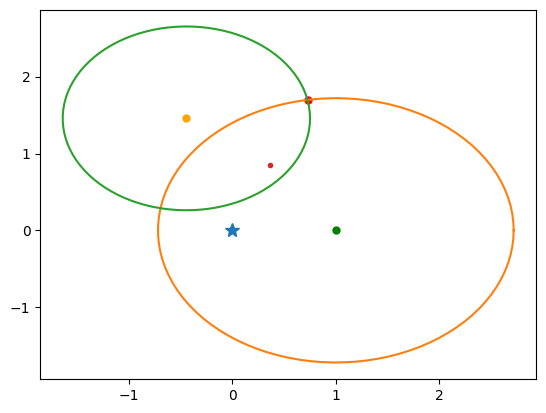

In [46]:
norm_F_ = (F1_[0]**2 + F1_[1]**2)**(1/2)
phi = np.arccos(F1_[0]/norm_F_)

elipse_center = [F1_[0]/2, F1_[1]/2]

"""
PF_ = ((earth[0]-F_[0])**2 + (earth[1] - F_[1])**2)**(1/2)
PF = ((earth[0]-F[0])**2 + (earth[1] - F[1])**2)**(1/2)

a = (PF_ + PF)/2
FF_ = ((F_[0] - F[0])**2 + (F_[1] + F[1])**2)**(1/2)

c = FF_/2
e = c/a
"""
e = 0.26
b = a*(1-e**2)**(1/2)

x = a*np.cos(alpha) 
y = b*np.sin(alpha) 

x_elipse = x*np.cos(phi) - y*np.sin(phi) + elipse_center[0]
y_elipse = x*np.sin(phi) + y*np.cos(phi) + elipse_center[1]

plt.plot(F[0], F[1], '*', markersize=10)
plt.plot(F1_[0], F1_[1], '.', markersize=10, color='r')
plt.plot(earth[0], earth[1], '.', markersize=10, color='green')
plt.plot(mars[0], mars[1], '.', markersize=10, color='orange')
#plt.plot(x_elipse, y_elipse, color='red')
plt.plot(elipse_center[0], elipse_center[1], '.')


In [20]:
PF_ = ((earth[0]-F_[0])**2 + (earth[1] - F_[1])**2)**(1/2)
PF = ((earth[0]-F[0])**2 + (earth[1] - F[1])**2)**(1/2)

a = (PF_ + PF)/2
FF_ = ((F_[0] - F[0])**2 + (F_[1] + F[1])**2)**(1/2)

c = FF_/2
e = c/a


0.6979002402088047

Veamos que para dado valor de a, los circulos centrados en P1 y P2 se intersectan en dos puntos F* $F*$, quiere decir que existen dos orbitas de transferencia posibles para ir del punto 1 al 2 veremos entonces que las dos orbitas presentan diferentes excentricidades y diferentes tiempo, pero la misma energía total. 

 ## Section 11.3: Lambert's Theorem 

 ## Section 11.4: Properties of the solutions to Lambert's Equation

For 





links that help me: 
- https://www.spacecraftresearch.com/generalized-orbit-rendezvous
- https://en.wikipedia.org/wiki/Space_rendezvous
- https://www.youtube.com/watch?v=ULRXJsiFMjo
- https://mappingignorance.org/2021/03/24/homa-a-space-orbit-simulator/